## Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

## Flow of Autoencoder

Noisy Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Clear Image

## Import Modules

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D , Dropout

## Load the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_images_from_folder(folder):
    images = []
    noisy_images = []
    for i in range(len(os.listdir(folder))):
        filename = 'image_'+str(i)+'.jpg'
        img_path = os.path.join(folder, filename)
        filename = 'image_noisy'+str(i)+'.jpg'
        noisy_img_path = os.path.join(folder, filename)

        if os.path.isfile(img_path):
            # Load the image
          img = cv2.imread(img_path)
          img = cv2.resize(img, (300, 300))
          noisy = cv2.imread(noisy_img_path)
          noisy = cv2.resize(noisy, (300, 300))
          images.append(img)
          noisy_images.append(noisy)

    return np.array(images)/255 , np.array(noisy_images)/255

In [4]:
x_test , x_test_noisy = load_images_from_folder('/content/drive/MyDrive/test')

x_train , x_train_noisy = load_images_from_folder('/content/drive/MyDrive/train')

In [5]:
x_train.shape,x_train_noisy.shape  , x_test.shape , x_test_noisy.shape

((800, 300, 300, 3),
 (800, 300, 300, 3),
 (200, 300, 300, 3),
 (200, 300, 300, 3))

In [6]:
height,width,channel = x_train[1].shape

## Exploratory Data Analysis

(300, 300, 3)

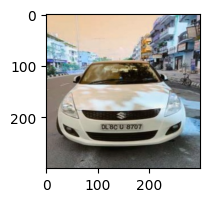

In [7]:
# randomly select input image
plt.figure(figsize = (2,2))
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_train[index].reshape(height,width,channel))
x_train[index].shape

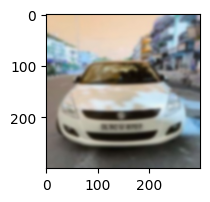

In [8]:
# randomly select input image
plt.figure(figsize = (2,2))
# plot the image
plt.imshow(x_train_noisy[index].reshape(height,width,channel))


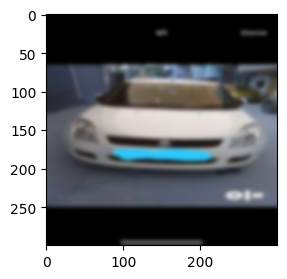

In [9]:
# randomly select input image
plt.figure(figsize = (3,3))
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(height,width,channel))
plt.gray()

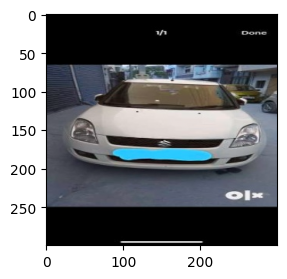

In [10]:
plt.figure(figsize = (3,3))
plt.imshow(x_test[index].reshape(height,width,channel))
plt.gray()

## Model Creation

In [11]:
model = Sequential([
                    # encoder network

                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(height,width,channel)),
                    MaxPooling2D(2, padding='same'),
                    Dropout(0.25),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Dropout(0.25),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),

                    # output layer
                    Conv2D(3, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 150, 150, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 16)        2

In [12]:
# train the model
model.fit(x_train_noisy, x_train,  epochs=100, batch_size=8, validation_data=(x_test_noisy,x_test))

Epoch 1/100
100/100 [==============================] - 17s 79ms/step - loss: 0.5897 - accuracy: 0.4974 - val_loss: 0.5457 - val_accuracy: 0.5748
Epoch 2/100
100/100 [==============================] - 6s 60ms/step - loss: 0.5455 - accuracy: 0.6038 - val_loss: 0.5463 - val_accuracy: 0.6312
Epoch 3/100
100/100 [==============================] - 6s 58ms/step - loss: 0.5424 - accuracy: 0.6660 - val_loss: 0.5444 - val_accuracy: 0.6915
Epoch 4/100
100/100 [==============================] - 6s 61ms/step - loss: 0.5406 - accuracy: 0.6892 - val_loss: 0.5431 - val_accuracy: 0.7246
Epoch 5/100
100/100 [==============================] - 6s 58ms/step - loss: 0.5396 - accuracy: 0.7206 - val_loss: 0.5408 - val_accuracy: 0.7424
Epoch 6/100
100/100 [==============================] - 6s 61ms/step - loss: 0.5387 - accuracy: 0.7433 - val_loss: 0.5412 - val_accuracy: 0.8119
Epoch 7/100
100/100 [==============================] - 6s 63ms/step - loss: 0.5381 - accuracy: 0.7556 - val_loss: 0.5401 - val_accuracy

## Saving the model

In [40]:
model.save('model.keras')

## Visualize the Results

In [14]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

7/7 [==============================] - 3s 47ms/step


In [32]:
def output_plot():
    index = np.random.randint(len(x_test))
    plt.figure(figsize = (10,10))
    # display noisy image
    ax = plt.subplot(1, 3, 1)
    plt.imshow(x_test_noisy[index].reshape(height,width,channel))
    plt.title('Input\nNoisy image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display predicted image
    ax = plt.subplot(1, 3, 2)
    plt.imshow(pred[index].reshape(height,width,channel))
    plt.title('Predicted image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display actual image
    ax = plt.subplot(1, 3, 3)
    plt.imshow(x_test[index].reshape(height,width,channel))
    plt.title('Expected\nOriginal Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

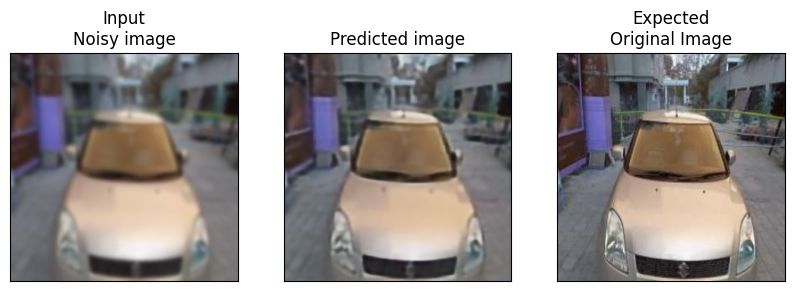

In [38]:
output_plot()

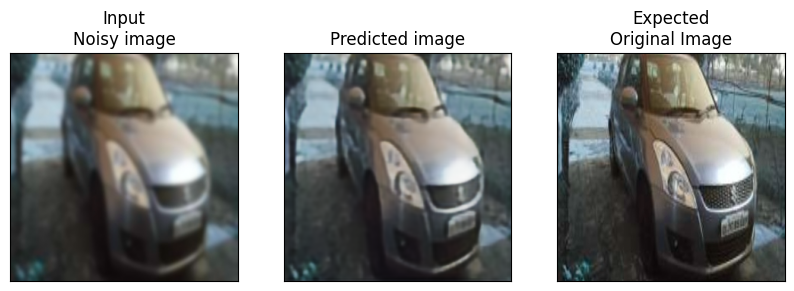

In [34]:
output_plot()

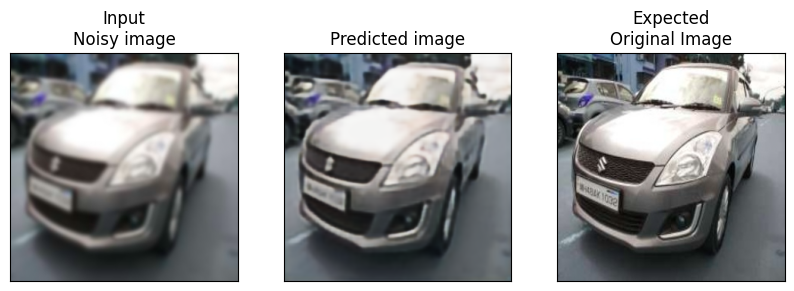

In [35]:
output_plot()

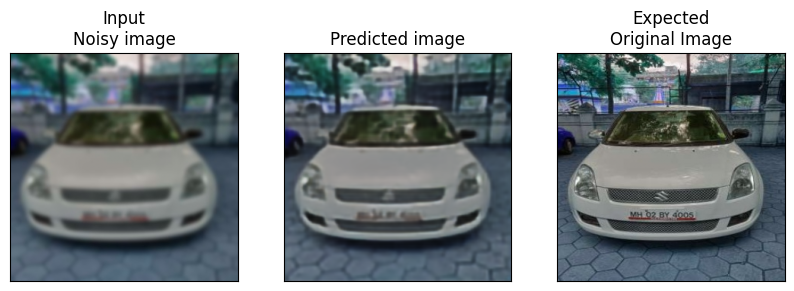

In [37]:
output_plot()

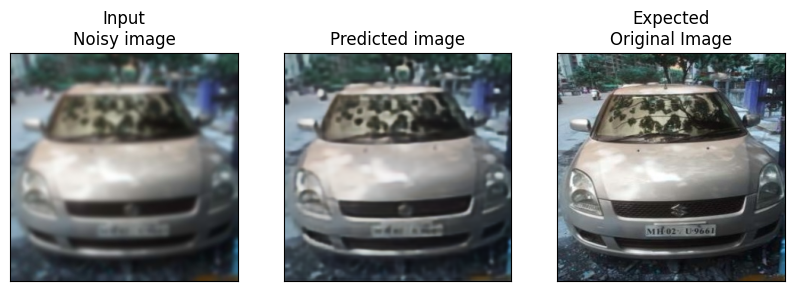

In [39]:
output_plot()